# Polynomial Regression 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv("Advertising.csv")

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
X = df.drop('sales',axis=1)

In [7]:
y = df['sales']

In [8]:
from sklearn.preprocessing import PolynomialFeatures 

In [9]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [11]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [13]:
polynomial_converter.transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [21]:
poly_features = polynomial_converter.transform(X)

In [22]:
poly_features.shape

(200, 9)

In [18]:
X.shape

(200, 3)

In [19]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [23]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [24]:
230.1*37.8  #5thTerm 

8697.779999999999

In [25]:
37.8*69.2 #8thTerm 

2615.7599999999998

In [26]:
230.1*69.2 #5thTerm 

15922.92

In [27]:
230.1**2

52946.009999999995

In [28]:
37.8**2

1428.8399999999997

In [29]:
69.2**2

4788.64

In [34]:
poly_features.shape

(200, 9)

In [30]:
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [38]:
from sklearn.model_selection import train_test_split 

In [39]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=101)

In [40]:
from sklearn.linear_model import LinearRegression 

In [41]:
model = LinearRegression()

In [43]:
model.fit(X_train,y_train)

LinearRegression()

In [44]:
test_predictions = model.predict(X_test)

In [45]:
model.coef_

array([ 5.25319441e-02,  1.42773271e-02,  1.47528851e-02, -1.12739168e-04,
        1.13231490e-03, -5.42180033e-05,  6.26813126e-05,  8.93347558e-05,
       -3.52004070e-05])

In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [47]:
MAE = mean_absolute_error(y_test,test_predictions)

In [48]:
MSE = mean_squared_error(y_test,test_predictions)

In [49]:
RMSE = np.sqrt(MSE)

In [50]:
MAE

0.4842810535215586

In [51]:
MSE

0.42028148421569617

In [52]:
RMSE

0.6482912032533653

In [53]:
model.coef_

array([ 5.25319441e-02,  1.42773271e-02,  1.47528851e-02, -1.12739168e-04,
        1.13231490e-03, -5.42180033e-05,  6.26813126e-05,  8.93347558e-05,
       -3.52004070e-05])

In [54]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [55]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [56]:
69.2**2

4788.64

In [57]:
# Create the different order poly
#split poly feat train/test 
#fit on train 
#store/save the rmse for BOTH the train AND test 
#PLOT the results (error vs poly order)

In [60]:
train_rmse_errors = []
test_rmse_errors = []
for d in range(1,10):
    
    poly_converter = PolynomialFeatures(degree=d, include_bias = False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
    

In [61]:
train_rmse_errors

[1.7376515982447711,
 0.5947926597019146,
 0.44059734232363656,
 0.3532913282038107,
 0.2484537229931113,
 0.18836238716589793,
 4.722022747237672,
 0.15323286253971005,
 0.15071540715907641]

In [62]:
test_rmse_errors

[1.5324409426512413,
 0.6482912032533653,
 0.5577254823362756,
 0.5064297278973824,
 2.357357683782791,
 11.217715741560507,
 1194.368961973932,
 3468.994416342332,
 166098.4151370038]

<function matplotlib.pyplot.legend(*args, **kwargs)>

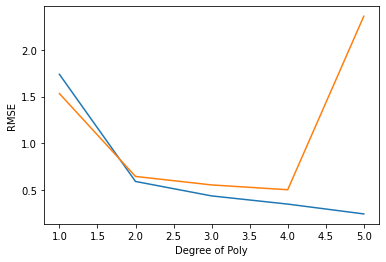

In [64]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN RMSE')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST RMSE')
plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

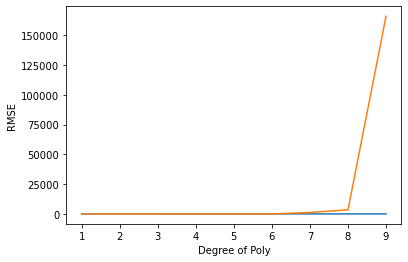

In [65]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN RMSE')
plt.plot(range(1,10),test_rmse_errors,label='TEST RMSE')
plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')
plt.legend

In [66]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [67]:
final_model = LinearRegression()

In [70]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

In [72]:
from joblib import dump,load

In [73]:
dump(final_model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [74]:
dump(final_poly_converter,'final_converter.joblib')

['final_converter.joblib']

In [75]:
loaded_converter = load('final_converter.joblib')

In [76]:
loaded_model = load('final_poly_model.joblib')

In [77]:
campaign = [[149,22,12]]

In [78]:
loaded_converter.fit_transform(campaign)

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [79]:
loaded_converter.fit_transform(campaign).shape

(1, 19)

In [80]:
transformed_data = loaded_converter.fit_transform(campaign)

In [81]:
loaded_model.predict(transformed_data)

array([14.64501014])